In [1]:
import household_contact_tracing.BranchingProcessSimulation as hct 
import numpy as np
import matplotlib.pyplot as plt

# Demo
In this document, we discuss how to initialise a model, access data and briefly go through the basics of model calibration.

## 1 - Running a model

For now, we assume that we know the parameters required to simulate a model. The are other notebooks used for model calibration. The following is a really simple model, which runs a household branching process epidemic, and contact tracing. The contact tracing parameters mean that 70% of contact tracing attempted succeed, those that do succeed have a delay which is distributed with a mean of 1.5 days. We define that 20% of infections will report their infection status and iniate self isolation. Social distancing is occurring, and individuals are reducing outside household contacts by 10%. There is 1 starting infection.

We initialise a simulation object with these parameters.

In [2]:
np.random.seed(1)
simulation = hct.household_sim_contact_tracing(haz_rate_scale=0.2,
                                               household_haz_rate_scale=0.8,
                                               contact_tracing_success_prob=0.7,
                                               contact_trace_delay_par=1.5,
                                               overdispersion=0.36,
                                               infection_reporting_prob=0.5,
                                               contact_trace=True,
                                               reduce_contacts_by=0.4,
                                               starting_infections=1)

Now that the object has been created, we need to decide what to do with it. We decide to run the simulation for 10 days.

In [3]:
simulation.run_simulation(time_out =  20)

It is possible to plot the network generated by the simulation, however it can be a little tricky to interpret. We primarily use this for testing.

The numbers are household_id. If two nodes share the same household_id then they are in the same household. If a node is shaded yellow, then they are in isolation and unable to make global contacts. Edges store information on contact tracing attemptes.

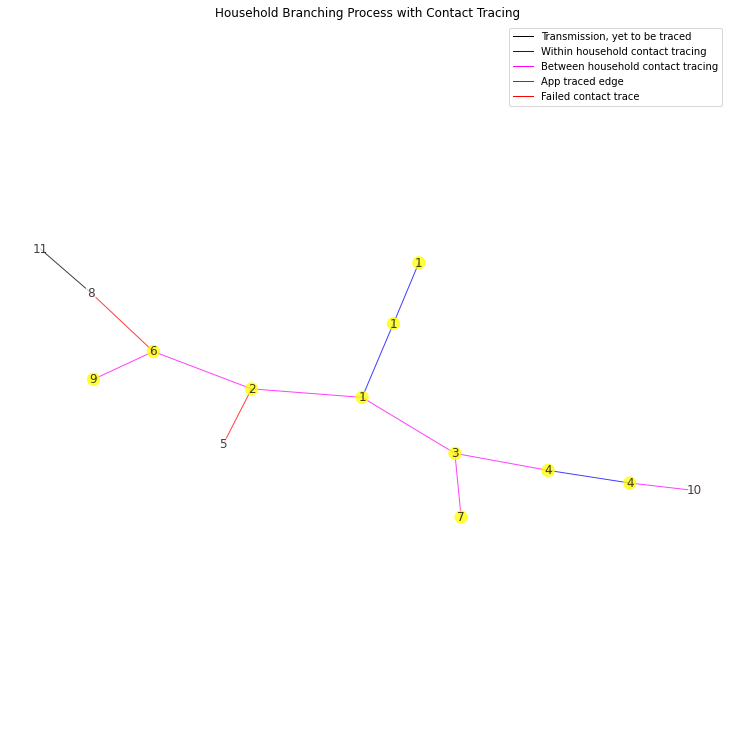

In [4]:
simulation.draw_network()

## 1.1 Accessing data about the simulation
Suppose that we want to get some specific information about a node in the network, for example we might be interested in finding out what time the 1st out of household infection occurred.

The first step is to lookup the second household, whcih is achieved by accessing the simulation household collection using households_id = 2;

In [5]:
simulation.houses.household(2).__dict__

{'houses': <household_contact_tracing.BranchingProcessSimulation.HouseholdCollection at 0x1f3b7b678e0>,
 'nodecollection': <household_contact_tracing.BranchingProcessSimulation.NodeCollection at 0x1f3b7b677f0>,
 'house_id': 2,
 'size': 2,
 'time': 3,
 'susceptibles': 1,
 'isolated': True,
 'isolated_time': 10,
 'propensity_to_leave_isolation': False,
 'hh_will_take_up_isolation': True,
 'propensity_trace_app': True,
 'contact_traced': True,
 'time_until_contact_traced': 9,
 'contact_traced_household_ids': [6],
 'being_contact_traced_from': 1,
 'propagated_contact_tracing': True,
 'time_propagated_tracing': 15,
 'contact_tracing_index': 0,
 'generation': 2,
 'infected_by_id': 1,
 'spread_to_ids': [5, 6],
 'node_ids': [3],
 'infected_by_node': 1,
 'within_house_edges': [],
 'had_contacts_traced': False}

We can see that household 2 is a household with size 2, and 1 susceptible. So there is only 1 infection in the household at the moment. Under node_ids, we see that node_id 3 is in household 2. In order to get information about node 3, we access the node collection object using node_id = 3.

In [6]:
simulation.nodes.node(3).__dict__

{'nodes': <household_contact_tracing.BranchingProcessSimulation.NodeCollection at 0x1f3b7b677f0>,
 'houses': <household_contact_tracing.BranchingProcessSimulation.HouseholdCollection at 0x1f3b7b678e0>,
 'node_id': 3,
 'time_infected': 3,
 'generation': 1,
 'household_id': 2,
 'isolated': True,
 'symptom_onset_time': 15,
 'serial_interval': 3,
 'recovery_time': 17,
 'will_report_infection': True,
 'time_of_reporting': 18,
 'has_contact_tracing_app': False,
 'testing_delay': 1,
 'contact_traced': True,
 'had_contacts_traced': False,
 'outside_house_contacts_made': 53,
 'spread_to': [7, 8],
 'spread_to_global_node_time_tuples': [(7, 8), (8, 10)],
 'recovered': True,
 'time_propagated_tracing': None,
 'propagated_contact_tracing': None,
 'infected_by_node': <household_contact_tracing.BranchingProcessSimulation.Node at 0x1f3b7b67460>}

This is the manner in which we access data in order to perform simulations.

## 1.2 Simulation results

Since we've just run a simulation, we are interested in some of the collected data. The are lots of other attributes stored in the simulation object, and it is possible to write more custom queries for getting these - examples of these would be given by the mehtods; onset_to_isolation_times, infeciton_to_isolation_times.

For the run_simulation method, the main output is the total number of infections over time, as we use this to estimate the growth rate.

Text(0, 0.5, 'Total infections')

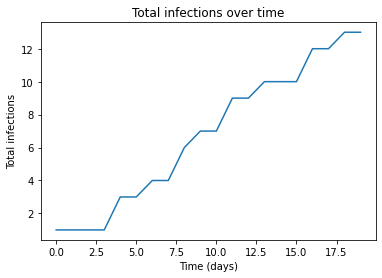

In [7]:
total_infections_over_time = simulation.inf_counts
plt.plot(range(20), total_infections_over_time)
plt.title('Total infections over time')
plt.xlabel('Time (days)')
plt.ylabel('Total infections')

## 1.3 Simulation end states



It is possible to make a simulation stop running when it reaches 5000 active infections (the value of 5000 was hardcoded, but has been removed in future simulations). The simulation is also coded to stop running when it reaches the time limit, or when extinction is achieved.

In [8]:
np.random.seed(1)
simulation = hct.household_sim_contact_tracing(haz_rate_scale=0.2,
                                               household_haz_rate_scale=0.8,
                                               contact_tracing_success_prob=0.7,
                                               contact_trace_delay_par=1.5,
                                               overdispersion=0.36,
                                               infection_reporting_prob=0.5,
                                               contact_trace=True,
                                               reduce_contacts_by=0.4,
                                               starting_infections=1)

simulation.run_simulation(time_out=15, stop_when_5000_infections=True)

In [9]:
simulation.end_reason

'timed_out'

'timed_out' means that the simulation hit it's time limit of 15 days and stopped running.

## 1.4 Detection time simulations

It is possible to run the model until the first case hsa been detected, in which case you will be interesteed in the delay from introduction until the first case detected, and how many cases there actually were. This can be useful when considering possible reintroduction of the virus to areas where it has been eliminated.

In [10]:
np.random.seed(1)
simulation = hct.household_sim_contact_tracing(haz_rate_scale=0.2,
                                               household_haz_rate_scale=0.8,
                                               contact_tracing_success_prob=0.7,
                                               contact_trace_delay_par=1.5,
                                               overdispersion=0.36,
                                               infection_reporting_prob=0.5,
                                               contact_trace=True,
                                               reduce_contacts_by=0.4,
                                               starting_infections=1)

simulation.run_simulation_detection_times()

In [11]:
simulation.end_reason

'infection_detected'

In [12]:
simulation.time

11

The above simulation stopped because an infection was detected at time 11.

# 2 Model calibration

We have hardcoded a number of the parameters about the epidemic, such as symptom onset distiribution. Again this has been removed in future versions but not for this release unforunately.

Model calibraiton is focussed around configuring the household secondary attack rate, this is controlled by household_haz_rate_scale. Then for a given infection_detection_prob, and household_haz_rate_scale the haz_rate_scale (which controlls the infectiousness of outside household contacts) must be configured. The haz_rate_scale is dependent upon infetion detection prob because nodes go into self-isolation when they report symptoms, which stops global contacts from occurring.

## 2.1 Household secondary attack rate

In [20]:
np.random.seed(1)
calibrator = hct.model_calibration(haz_rate_scale=0.2,
                                    household_haz_rate_scale=0.8,
                                    contact_tracing_success_prob=0.7,
                                    contact_trace_delay_par=1.5,
                                    overdispersion=0.36,
                                    infection_reporting_prob=0.5,
                                    contact_trace=True,
                                    reduce_contacts_by=0.4,
                                    starting_infections=100)                                               

In [21]:
calibrator.estimate_secondary_attack_rate()

0.1810344827586207

We typically perform the estimation for a range of household_haz_rate_scales, and then perform a regression to find the value of household_haz_rate_scales that gives us the desired household secondary attack rates.

## 2.2 Epidemic growth rate

The final parameter that needs to be set is the haz_rate_scale, recalling that haz_rate_scale, infection_reporting_prov and household_haz_rate_scale together define the growth rate of the epidemic. We employ grid search when performing this calibration step - this is carried out by SimulationScripts/growth_rate_calibration_data_gen.py using parallel processing to speed it up.

For each grid we output the total number of infections for the given parameter combination, this data is saved in Calibration/growth_rates.xlsx. Analysis of the raw simulation output is carried out using Notebooks/Calibration.ipynb. Essentially, we difference the data to get the number of new infection per day, tkae the log and fit a regression model to estimate the growth rate for that combinaiton of parameters. Finally we regress simulation input parameters onto the growth rates, and solve for a range of infeciton detection probabilities.

Our approach is to output a calibration dictionary that can then be loaded for use in the simulation scripts.